In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm
%matplotlib inline

In [2]:
def fEuler(f,t,z,h,args=()):
    
    """
    <Description of routine goes here: what it does, how it's called>
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    # The following trick allows us to pass additional parameters to f
    # first we make sure that args is of type tuple; if not, we make it into
    # that form
    if not isinstance(args,tuple):
        args = (args,)
      
    # when we call f, we use *args to pass it as a list of parameters.
    # for example, if elsewhere we define f like
    # def f(t,z,x,y):
    #    ...
    # then we would call this routine as
    # znew = fEuler(f,t,z,h,args=(x,y))
    #

    return z + h*f(0,z,*args)

# You will need to flesh out the following routines for a second-order
# Runge-Kutta step and a fourth order Runge-Kutta step.

def rk2(f,t,z,h,args=()):
    """
    <Description of routine goes here: what it does, how it's called>
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    if not isinstance(args,tuple):
        args = (args,)
    
    # delete the line "pass" when you put in the full routine

    zp = z + (h/2)*f(0,z,*args)
    return z + h*f(h/2,zp,*args)

def rk4(f,t,z,h,args=()):
    """
    <Description of routine goes here: what it does, how it's called>
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        <fill this in>
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
   
    if not isinstance(args,tuple):
        args = (args,)
    
    # delete the line "pass" when you put in the full routine
    
    k1 = f(0,z,*args)
    k2 = f(h/2,z+(h/2)*k1,*args)
    k3 = f(h/2,z+(h/2)*k2,*args)
    k4 = f(h,z+h*k3,*args)
    return z + (h/6)*(k1 + 2*k2 + 2*k3 + k4)



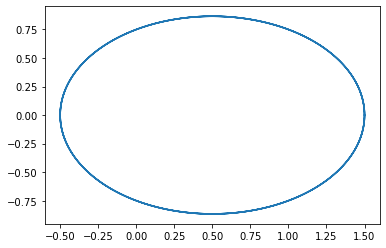

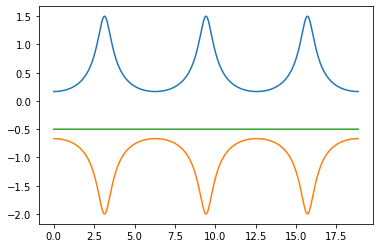

[0.5465592764187875, 0.5977837276126504, 0.22355685026886718, 0.03476654501687704, 0.0047213826556300464, 0.0006050046980976553, 7.613408092432827e-05]


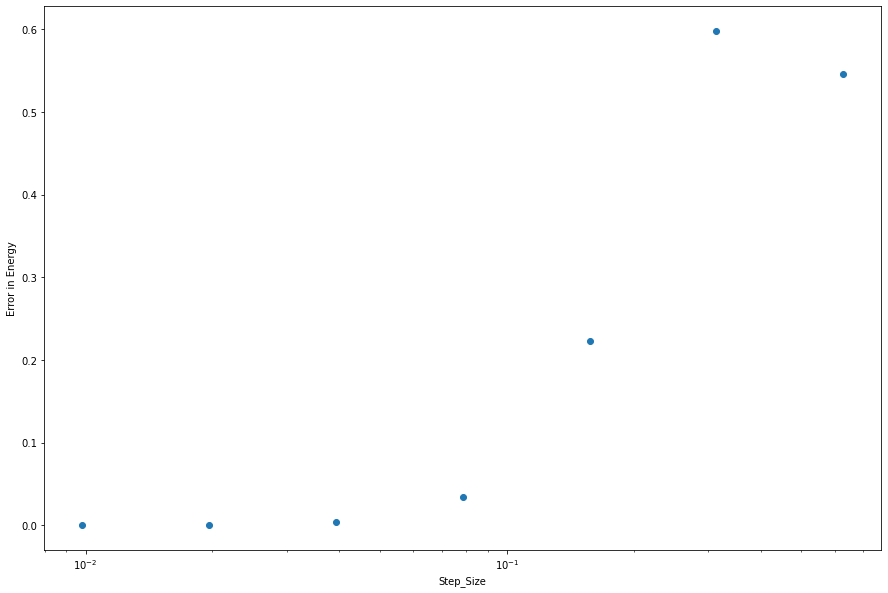

In [5]:
########################################################################
# Team Jimmy Neutron: Anita Agasaveeran, Nick Persha, Levi Webb, Evelyn Bruinsma
# AST 304, Fall 2022
# Michigan State University
########################################################################

"""
<Description of this module goes here: what it does, how it's used.>
"""
#from ode import fEuler, rk2, rk4
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm

# Method Identification
integration_methods = {
    'Euler':fEuler,
    'RK2':rk2,
    'RK4':rk4
    }
    
# Energies
def kinetic_energy(v):
    """
    Returns kinetic energy per unit mass: KE(v) = 0.5 v*v.
    
    Arguments
        v (array-like)
            velocity vector
    """
    return 0.5*np.dot(v,v)

def potential_energy(x,m):
    """
    Returns potential energy per unit mass: PE(x, m) = -m/norm(r)

    Arguments
        x (array-like)
            position vector
        m (scalar)
            total mass in normalized units
    """
    # the norm function returns the length of the vector
    r = norm(x)
    return -m/r

def total_energy(z,m):
    """
    Returns energy per unit mass: E(z,m) = KE(v) + PE(x,m)

    Arguments
        <fill this in>
    """
    # to break z into position, velocity vectors, we use array slices:
    # here z[n:m] means take elements of z with indices n <= j < m
    r = z[0:2]  # start with index 0 and take two indices: 0 and 1
    v = z[2:4]  # start with index 2 and take two indices: 2 and 3

    # replace the following two lines
    KE = kinetic_energy(v)
    PE = potential_energy(r, m)
    return KE + PE

def derivs(t,z,m):
    """
    Computes derivatives of position and velocity for Kepler's problem 
    
    Arguments
        <fill this in>
    Returns
        numpy array dzdt with components [ dx/dt, dy/dt, dv_x/dt, dv_y/dt ]
    """
    # Fill in the following steps
    # 1. split z into position vector and velocity vector (see total_energy for example)
    # 2. compute the norm of position vector, and use it to compute the force
    # 3. compute drdt (array [dx/dt, dy/dt])
    # 4. compute dvdt (array [dvx/dt, dvy/dt])

    # join the arrays
    r = z[0:2]
    v = z[2:4]
    rmag = norm(r)
    
    dvdt = -m/(rmag**3) * r
    drdt = v

    dzdt = np.concatenate((drdt,dvdt))
    return dzdt

def integrate_orbit(z0,m,tend,h,method='RK4'):
    """
    Integrates orbit starting from an initial position and velocity from t = 0 
    to t = tend.
    
    Arguments:
        z0
            < fill this in >

        m
            < fill this in >
    
        tend
            < fill this in >
    
        h
            < fill this in >
    
        method ('Euler', 'RK2', or 'RK4')
            identifies which stepper routine to use (default: 'RK4')

    Returns
        ts, Xs, Ys, KEs, PEs, TEs := arrays of time, x postions, y positions, 
        and energies (kin., pot., total) 
    """

    # set the initial time and phase space array
    t = 0.0
    z = z0

    # expected number of steps
    Nsteps = int(tend/h)+1

    # arrays holding t, x, y, kinetic energy, potential energy, and total energy
    ts = np.zeros(Nsteps)
    Xs = np.zeros(Nsteps)
    Ys = np.zeros(Nsteps)
    KEs = np.zeros(Nsteps)
    PEs = np.zeros(Nsteps)
    TEs = np.zeros(Nsteps)

    # store the initial point
    ts[0] = t
    Xs[0] = z[0]
    Ys[0] = z[1]
    # now extend this with KEs[0], PEs[0], TEs[0]
    KEs[0] = kinetic_energy(z0[2:4])
    PEs[0] = potential_energy(z0[0:2], m)
    TEs[0] = total_energy(z0, m)
    # select the stepping method
    advance_one_step = integration_methods[method]
    # run through the steps
    for step in range(1,Nsteps):
        z = advance_one_step(derivs,t,z,h,args=m)
        # insert statement here to increment t by the stepsize 
        t +=  h
        # store values
        ts[step] = t
        # fill in with assignments for Xs, Ys, KEs, PEs, TEs
        Xs[step] = z[0]
        Ys[step] = z[1]
        KEs[step] = kinetic_energy(z[2:4])
        PEs[step] = potential_energy(z[0:2], m)
        TEs[step] = total_energy(z, m)
    return ts, Xs, Ys, KEs, PEs, TEs
    
def set_initial_conditions(a, m, e):
    """
    set the initial conditions for the orbit.  The orientation of the orbit is 
    chosen so that y0 = 0.0 and vx0 = 0.0.
    
    Arguments
        a
            semi-major axis in AU
        m
            total mass in Msun
        e
            eccentricity ( x0 = (1+e)*a )
    
    Returns:
    x0, y0, vx0, vy0, eps0, Tperiod := initial position and velocity, energy, 
        and period
    """
        
    # fill in the following lines with the correct formulae
    # total energy per unit mass
    eps0 = -m/(2*a)
    # period of motion
    Tperiod = 2*np.pi

    # initial position
    # fill in the following lines with the correct formulae
    x0 = 1.5*a
    y0 = 0

    # initial velocity is in y-direction; we compute it from the energy
    # fill in the following lines with the correct formulae
    vx0 = 0.0
    vy0 = np.sqrt(2*eps0 + 2*m/x0)
    
    return np.array([x0,y0,vx0,vy0]), eps0, Tperiod


m = 1
z0, eps0, Tperiod = set_initial_conditions(1,1,0.5)
h = 0.1 * Tperiod
tend = 3*Tperiod

# ts, Euler_Xs, Euler_Ys, KEs, PEs, TEs = integrate_orbit(z0,m,tend,h,method='Euler')
ts, RK2_Xs, RK2_Ys, KEs, PEs, TEs = integrate_orbit(z0,m,tend,h/1024,method='RK2')
#ts, RK4_Xs, RK4_Ys, KEs, PEs, TEs = integrate_orbit(z0,m,tend,h,method='RK4')
# plt.plot(Euler_Xs, Euler_Ys)
# plt.plot(RK2_Xs, RK2_Ys)

plt.plot(RK2_Xs, RK2_Ys)
plt.show()

plt.plot(ts, KEs)
plt.plot(ts, PEs)
plt.plot(ts, TEs)
plt.show()

Energy = []
step_sizes = []

for i in range(0,7):
    TEs = None
    z0, esp0, T = set_initial_conditions(a=1,m=1,e=.5)
    h0 = 0.1*T
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0,m = 1, tend = T*3, h = h0/(2**i), method = "RK2")
    Energy.append((TEs[0] - TEs[-1])/TEs[0])
    step_sizes.append((T*.1)/(2**i))
    
print(Energy)
plt.figure(figsize = (15,10))
plt.scatter(step_sizes, Energy)
plt.xlabel("Step_Size")
plt.ylabel("Error in Energy")
plt.xscale("log")
plt.yscale("linear")

In [12]:
#set initial conditions for the orbit

a = 1 #semi-major axis in AU
m = 1 #mass in solar masses
e = .5 #ecentricity 

init = set_initial_conditions(a,m,e)

#create initial position and velocity array (z = [x0,y0,vx0,vy0])
z0 = init[0]

#Orbital Period:
T = init[2] 

#initial step size
h0 = 0.1*T

#total time to run
t_tot = 3*T

#iterable list of the methods
methods = ['Euler','RK2','RK4']

#Loop through the different step sizes for each method and save the results in an array

#create an array of step sizes:
hlist = np.zeros(11)
for i in range(11):
    h=h0/2**i
    hlist[i]=h

#Create a list of error arrays (results[0=Euler,1=RK2,2=RK4])
results = []

#loop through the methods
for method in methods:
    
    #create an array to put errors for each step size
    TE_errs = np.zeros(11)

    #loop through step sizes
    for i in range(11):
        
        h = hlist[i]

        sol = integrate_orbit(z0,m,t_tot,h,method)
        
        #get the total energy array
        TEs = sol[5]
        
        #calculate the percent error 
        TE_err = (TEs[0]-TEs[-1])/TEs[0]

        TE_errs[i] = TE_err
    results.append(TE_errs)

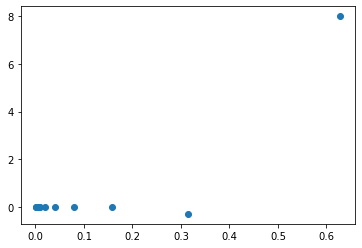

In [14]:
plt.scatter(hlist,results[2])